In [1]:
library(tidyverse)
library(glue)
library(dplyr)

install.packages("showtext")
install.packages("extrafont")
library(extrafont)
font_import()


theme_rangeframe <- function(size = 0.3) {
    theme(
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )
}

scale_axis_rangeframe <- function() {
    guides(x = "axis_truncated", y = "axis_truncated")
}

rotate_x_text <- function(angle=45) {
    theme(
        axis.text.x = element_text(angle = angle, hjust = 1)
    )
}

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}

no_legend <- function() {
    theme(
        legend.position = "none"
    )
}

no_margin <- function() {
    theme(
        plot.margin = margin(0, 0, 0, 0, unit = "lines")
    )
}

no_label <- function() {
    theme(
        axis.title = element_blank()
    )
}

no_text <- function() {
    theme(
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()
    )
}

no_x_text <- function() {
    theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
}

no_y_text <- function() {
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )
}


custom_theme <- function(size = 0.3){
    theme_minimal() +
    theme(
        text = element_text(family='Helvetica'),
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )

}
theme_set(custom_theme())

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}


Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Bold.ttf
 : DejaVuSans-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-BoldOblique.ttf
 : DejaVuSans-BoldOblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-ExtraLight.ttf
 : DejaVuSans-ExtraLight already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Oblique.ttf
 : DejaVuSans-Oblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans.ttf
 : DejaVuSans already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-Bold.ttf
 : DejaVuSansCondensed-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-BoldOblique.ttf
 : DejaVuSansCondensed-BoldOblique already registered in fonts d

In [2]:
output_dir <- glue("/lustre/groups/ml01/workspace/ot_perturbation/figures/sciplex/reconstruction/plots_{split_to_filter}_{dosage_to_filter_str}_test")

ERROR: [1m[33mError[39m:[22m
[33m![39m Failed to evaluate glue component {split_to_filter}
[1mCaused by error:[22m
[33m![39m object 'split_to_filter' not found


In [2]:
dosage_to_filter <- "10\\.0$"
dosage_to_filter_str <- sub("\\\\.*", "", dosage_to_filter)

In [10]:
color_dict <- c("PCA 50"= "#8EB897", "PCA 100"= "#5B7553", "PCA 300"="#303D2B" , "VAE"= "#9DDBAD")


In [16]:
results_decoded <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/allocation/encoder_decoder_metrics_decoded_test.csv")
results_decoded <- results_decoded %>%
  filter(grepl(dosage_to_filter, variable))



New names:
• `` -> `...1`
Rows: 332 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): embedding, metric, variable
dbl (3): ...1, value, dose

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


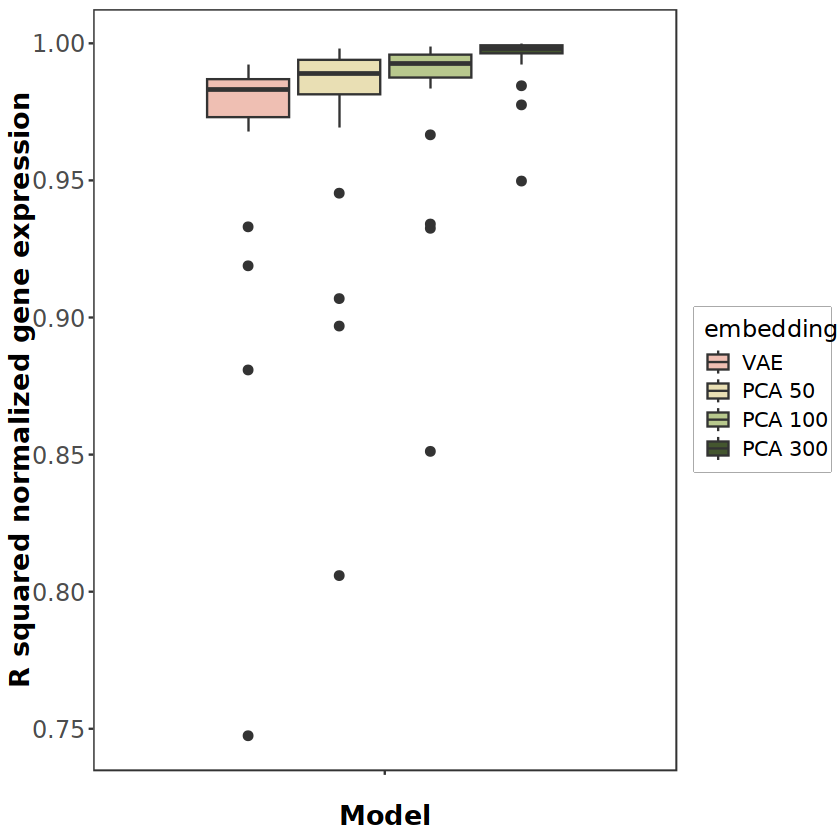

In [18]:
results_decoded$embedding <- factor(results_decoded$embedding, levels = c("vae", "PCA_50", "PCA_100", "PCA_300"), labels = c("VAE", "PCA 50", "PCA 100", "PCA 300"))  # Correct factorization

p <- ggplot(results_decoded, aes(x=metric, y=value, fill=embedding)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y=glue("R squared normalized gene expression")) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  scale_x_discrete(labels=c("")) +  # Keep this if you want no x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [ ]:
ggsave(file.path(output_dir, "ood_r_squared_decoded.pdf"), plot = p, device = "pdf")

# Encoded

In [19]:
results_encoded <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/allocation/encoder_decoder_metrics_encoded.csv")
results_encoded <- results_encoded %>%
  filter(grepl(dosage_to_filter, variable))



New names:
• `` -> `...1`
Rows: 1328 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): embedding, metric, variable
dbl (3): ...1, value, dose

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


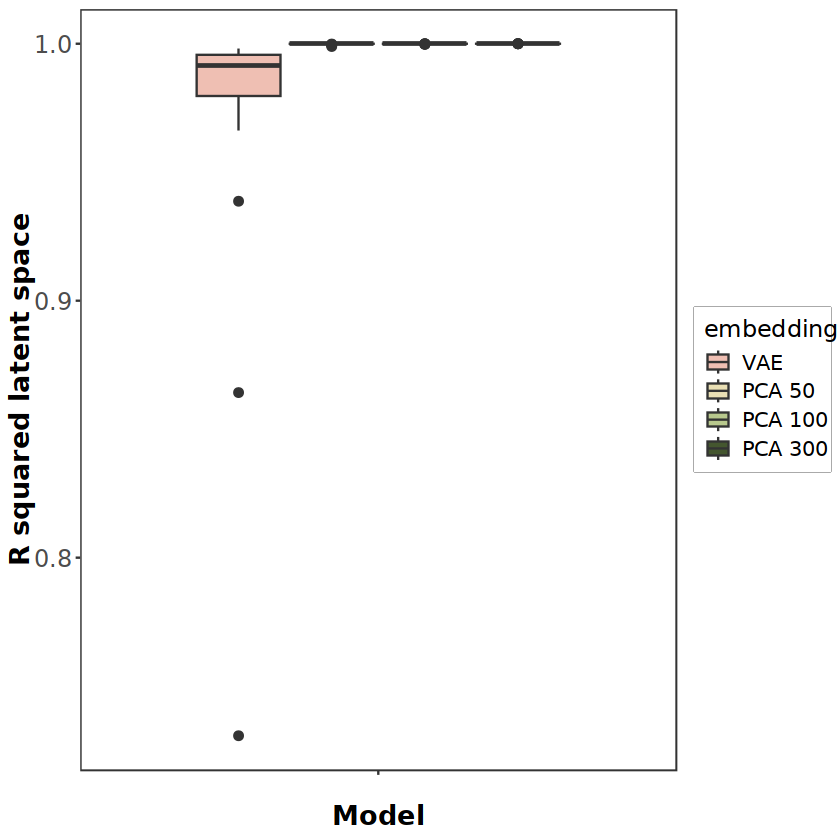

In [25]:
results <- results_encoded %>% filter(metric == "r_squared")
results$embedding <- factor(results$embedding, levels = c("vae", "PCA_50", "PCA_100", "PCA_300"), labels = c("VAE", "PCA 50", "PCA 100", "PCA 300"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=embedding)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="R squared latent space") +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  scale_x_discrete(labels=c("")) +  # Keep this if you want no x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [ ]:
ggsave(file.path(output_dir, "ood_r_squared_encoded.pdf"), plot = p, device = "pdf")

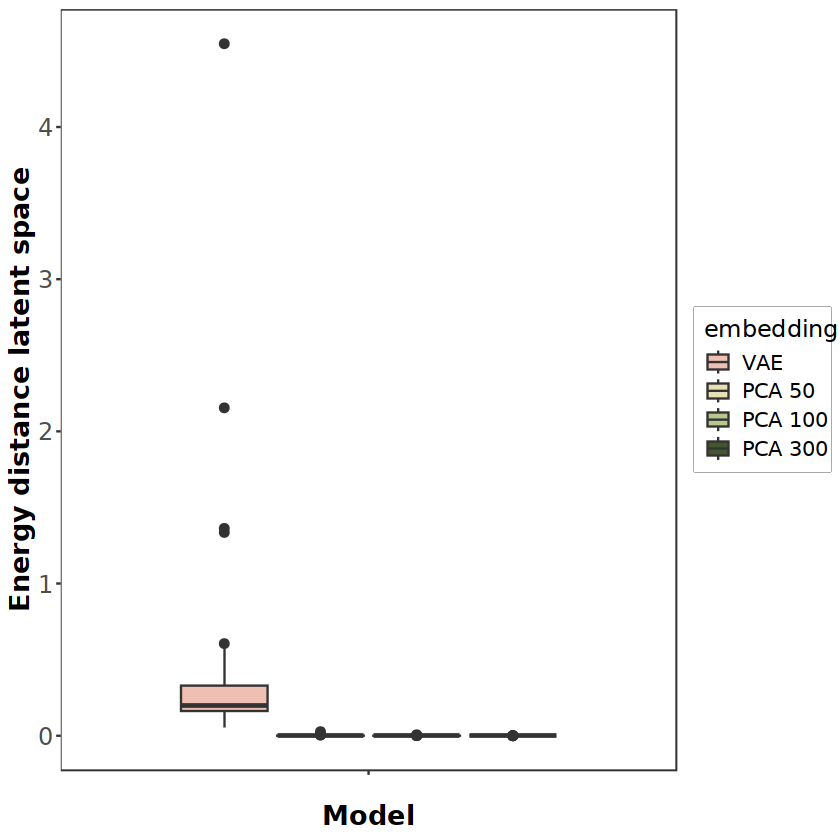

In [26]:
results <- results_encoded %>% filter(metric == "e_distance")
results$embedding <- factor(results$embedding, levels = c("vae", "PCA_50", "PCA_100", "PCA_300"), labels = c("VAE", "PCA 50", "PCA 100", "PCA 300"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=embedding)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Energy distance latent space") +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  scale_x_discrete(labels=c("")) +  # Keep this if you want no x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [ ]:
ggsave(file.path(output_dir, "ood_e_distance_encoded.pdf"), plot = p, device = "pdf")

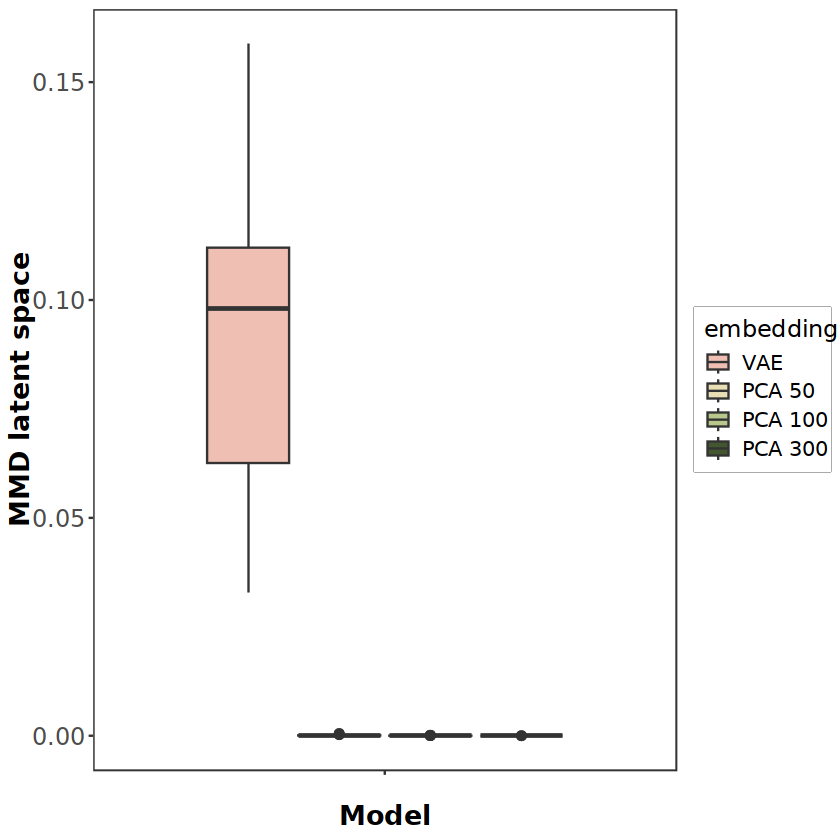

In [27]:
results <- results_encoded %>% filter(metric == "mmd")
results$embedding <- factor(results$embedding, levels = c("vae", "PCA_50", "PCA_100", "PCA_300"), labels = c("VAE", "PCA 50", "PCA 100", "PCA 300"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=embedding)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="MMD latent space") +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  scale_x_discrete(labels=c("")) +  # Keep this if you want no x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [ ]:
ggsave(file.path(output_dir, "ood_mmd_distance_encoded.pdf"), plot = p, device = "pdf")

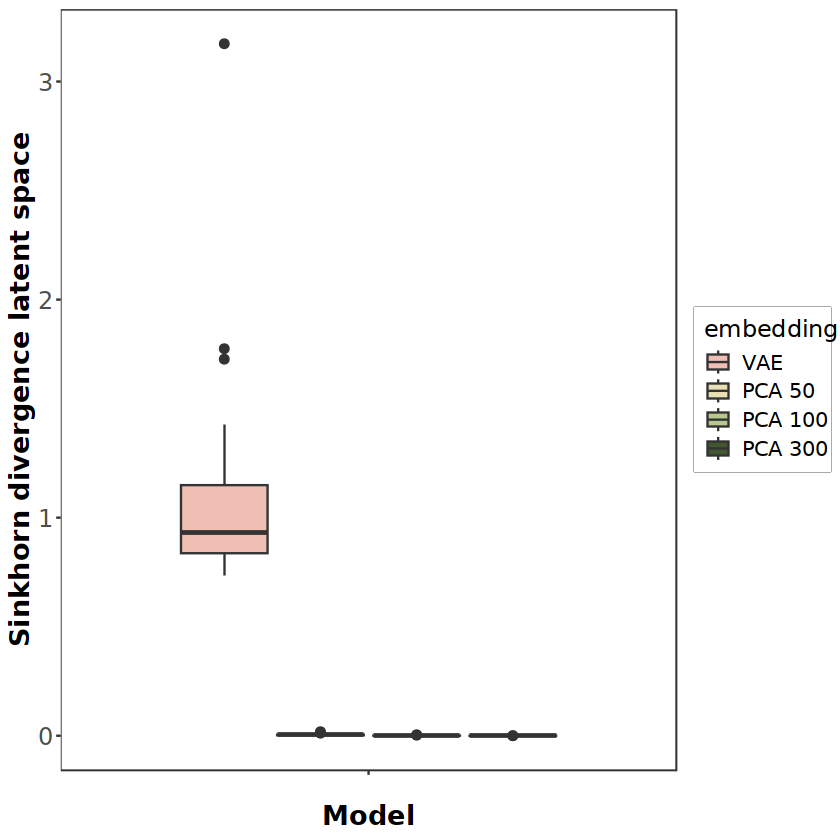

In [28]:
results <- results_encoded %>% filter(metric == "sinkhorn_div")
results$embedding <- factor(results$embedding, levels = c("vae", "PCA_50", "PCA_100", "PCA_300"), labels = c("VAE", "PCA 50", "PCA 100", "PCA 300"))  # Correct factorization

p <- ggplot(results, aes(x=metric, y=value, fill=embedding)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Sinkhorn divergence latent space") +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  scale_x_discrete(labels=c("")) +  # Keep this if you want no x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p

In [ ]:
ggsave(file.path(output_dir, "ood_sink_div_encoded.pdf"), plot = p, device = "pdf")

# DEG

In [36]:
results_deg <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/allocation/encoder_decoder_metrics_deg.csv")
results_deg <- results_deg %>%
  filter(grepl(dosage_to_filter, variable))

New names:
• `` -> `...1`
Rows: 1328 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): embedding, metric, variable
dbl (3): ...1, value, dose

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


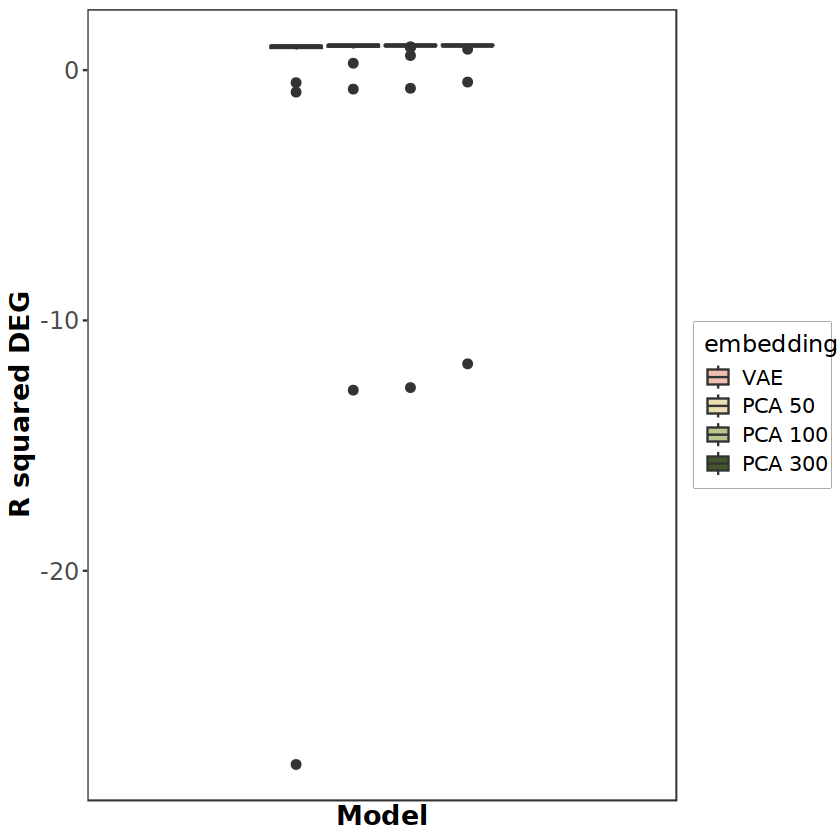

In [37]:
results <- results_deg %>% filter(metric == "r_squared")
results$embedding <- factor(results$embedding, levels = c("vae", "PCA_50", "PCA_100", "PCA_300"), labels = c("VAE", "PCA 50", "PCA 100", "PCA 300"))  # Correct factorization


p <- ggplot(results, aes(x=dose, y=value, fill=embedding)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="R squared DEG") +
  scale_fill_manual(values=color_dict) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
#ggsave(file.path(fig_dir, "ood_reconstruction_r_squared.pdf"), plot = p, device = "pdf")
p

In [ ]:
ggsave(file.path(output_dir, "ood_r_squared_deg.pdf"), plot = p, device = "pdf")

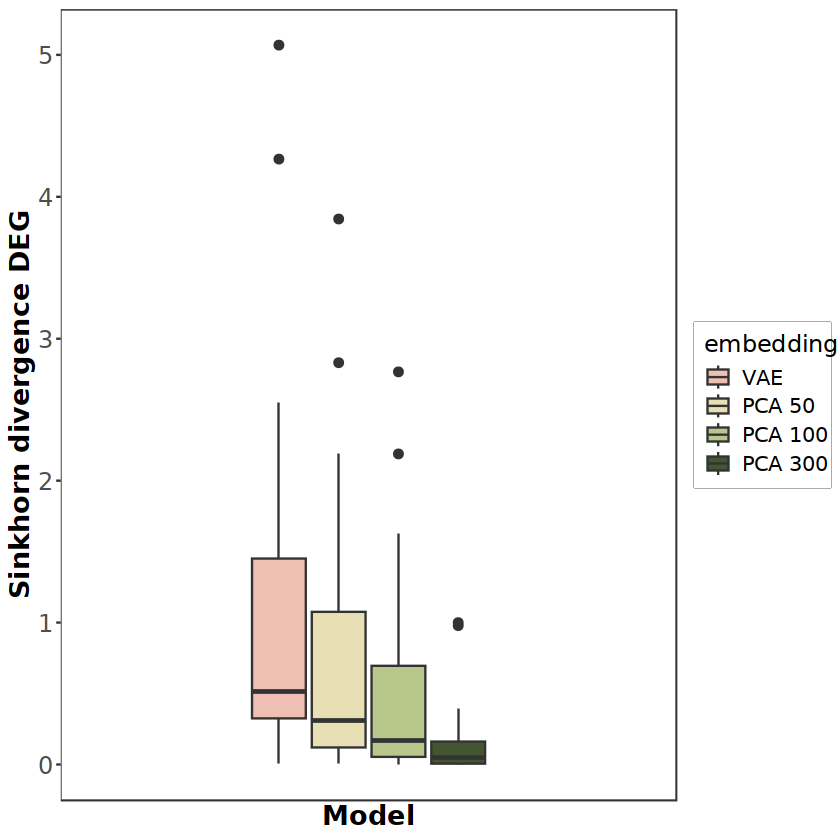

In [38]:
results <- results_deg %>% filter(metric == "sinkhorn_div")
results$embedding <- factor(results$embedding, levels = c("vae", "PCA_50", "PCA_100", "PCA_300"), labels = c("VAE", "PCA 50", "PCA 100", "PCA 300"))  # Correct factorization


p <- ggplot(results, aes(x=dose, y=value, fill=embedding)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Sinkhorn divergence DEG") +
  scale_fill_manual(values=color_dict) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
#ggsave(file.path(fig_dir, "ood_reconstruction_r_squared.pdf"), plot = p, device = "pdf")
p

In [ ]:
ggsave(file.path(output_dir, "ood_sink_div_deg.pdf"), plot = p, device = "pdf")

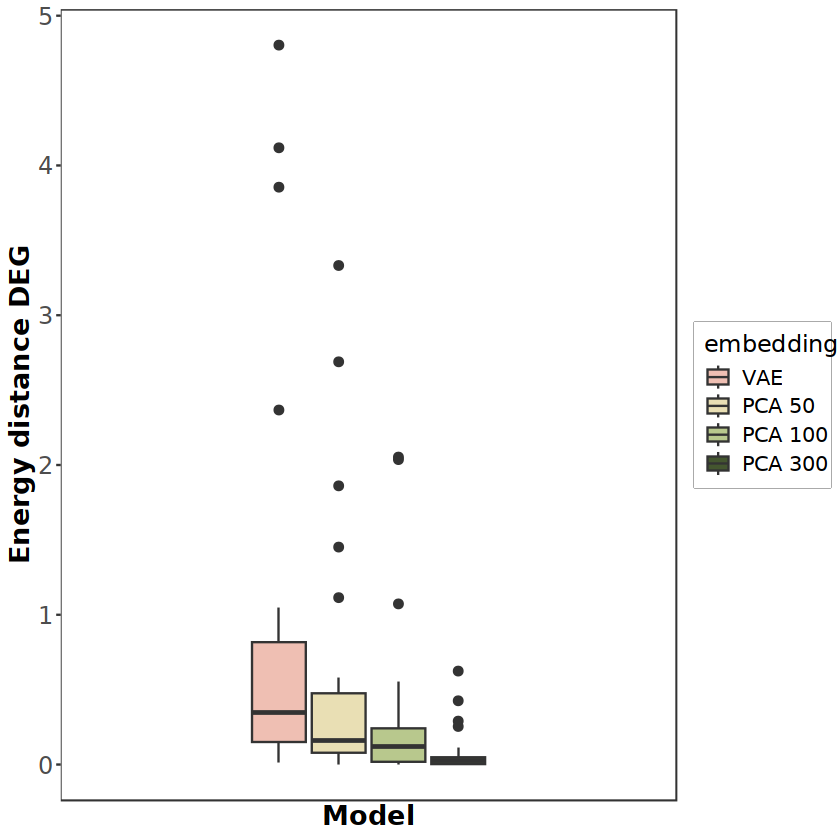

In [39]:
results <- results_deg %>% filter(metric == "e_distance")
results$embedding <- factor(results$embedding, levels = c("vae", "PCA_50", "PCA_100", "PCA_300"), labels = c("VAE", "PCA 50", "PCA 100", "PCA 300"))  # Correct factorization


p <- ggplot(results, aes(x=dose, y=value, fill=embedding)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="Energy distance DEG") +
  scale_fill_manual(values=color_dict) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
#ggsave(file.path(fig_dir, "ood_reconstruction_r_squared.pdf"), plot = p, device = "pdf")
p

In [ ]:
ggsave(file.path(output_dir, "ood_e_distance_deg.pdf"), plot = p, device = "pdf")

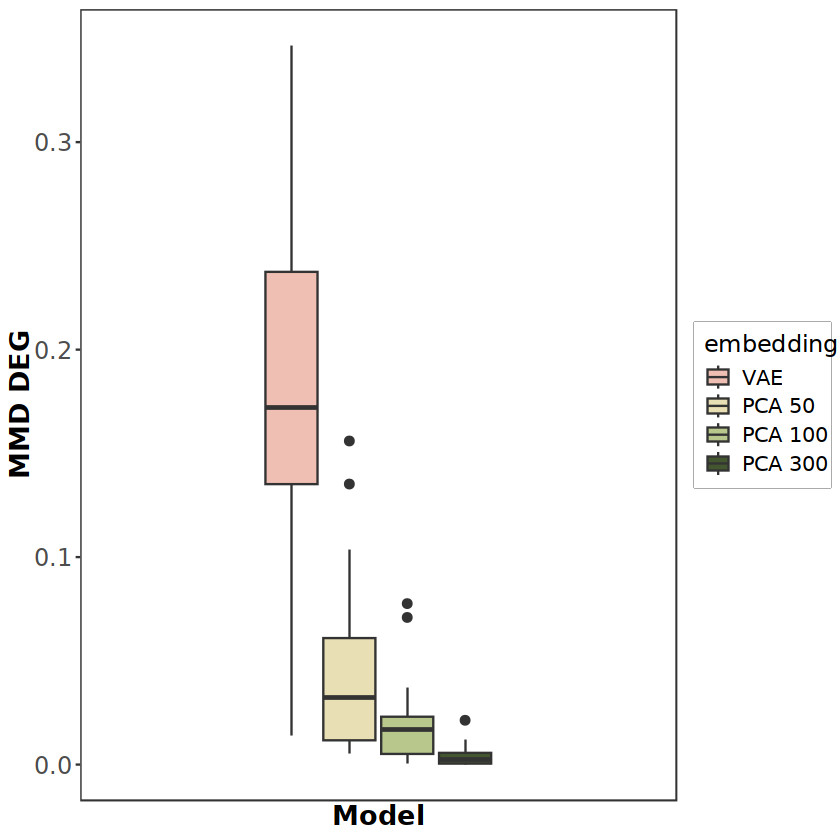

In [40]:
results <- results_deg %>% filter(metric == "mmd")
results$embedding <- factor(results$embedding, levels = c("vae", "PCA_50", "PCA_100", "PCA_300"), labels = c("VAE", "PCA 50", "PCA 100", "PCA 300"))  # Correct factorization


p <- ggplot(results, aes(x=dose, y=value, fill=embedding)) +
  geom_boxplot(outlier.size=2) +
  labs(x="Model", y="MMD DEG") +
  scale_fill_manual(values=color_dict) +
  scale_x_discrete(labels=c("")) +  # Change x-axis labels
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16, face="bold"),
    axis.title.y = element_text(size=16, face="bold"),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
ggsave(file.path(fig_dir, "ood_reconstruction_r_squared.pdf"), plot = p, device = "pdf")
p

In [ ]:
ggsave(file.path(output_dir, "ood_mmd_deg.pdf"), plot = p, device = "pdf")